# What is the True Normal Human Body Temperature? (*solution*)

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

## Preliminary Visual Inspection
Becoming familiar with the data:

In [22]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

print('>>> Shape =', df.shape)
display(df.head(5))    
print('\n>>> Types\n', df.dtypes)

>>> Shape = (130, 3)


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0



>>> Types
 temperature    float64
gender          object
heart_rate     float64
dtype: object


### Plotting categorical data:

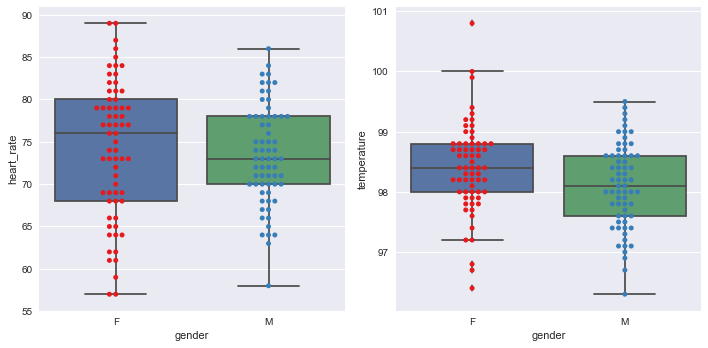

In [23]:
# initialize seaborn style for matplotlib
sns.set() 
fig, ax = plt.subplots(figsize=(10,5))

plt.subplot(1, 2, 1)
sns.boxplot(x="gender", y="heart_rate", data=df)
sns.swarmplot(x="gender", y="heart_rate", data=df, palette="Set1");

plt.subplot(1, 2, 2)
sns.boxplot(x="gender", y="temperature", data=df)
sns.swarmplot(x="gender", y="temperature", data=df, palette="Set1");

plt.tight_layout()
plt.show()

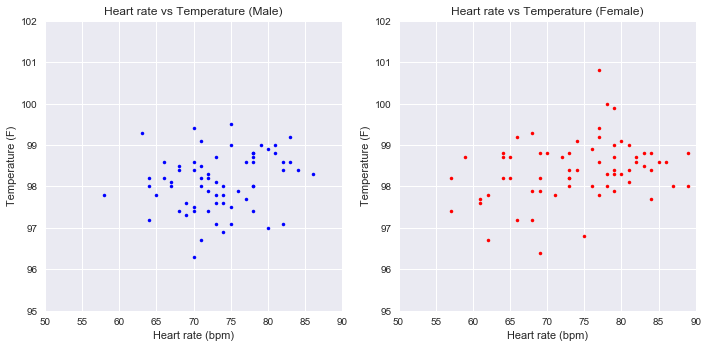

In [24]:
male_df = df.loc[df.gender == 'M']
female_df = df.loc[df.gender == 'F']

fig, ax = plt.subplots(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(male_df.heart_rate, male_df.temperature, marker='.', linestyle='none', color='blue')
plt.title('Heart rate vs Temperature (Male)')
plt.xlabel('Heart rate (bpm)')
plt.ylabel('Temperature (F)')
plt.axis((50, 90, 95, 102))

plt.subplot(1, 2, 2)
plt.plot(female_df.heart_rate, female_df.temperature, marker='.', linestyle='none', color='red')
plt.title('Heart rate vs Temperature (Female)')
plt.xlabel('Heart rate (bpm)')
plt.ylabel('Temperature (F)')
plt.axis((50, 90, 95, 102))

plt.tight_layout()
plt.show()

---
## 1. Is the distribution of body temperatures normal?

Yes, the theoretical CDF and the ECDF of the data (ploted below) suggest that the body temperatures are **normally distributed**.

In [25]:
### ecdf(): returns a one-dimensional array of measurements
def ecdf(data):       
    n = len(data)                # number of data points: n
    x = np.sort(data)            # x-data for the ECDF: x    
    y = np.arange(1, n+1/n) / n  # y-data for the ECDF: y
    return x, y

In [26]:
### Compute summary statistics
mean    = np.mean(df.temperature) 
std     = np.std(df.temperature) 

>>> mean    = 98.24923076923078
>>> std dev = 0.7303577789050377
>>> derived samples = 5000


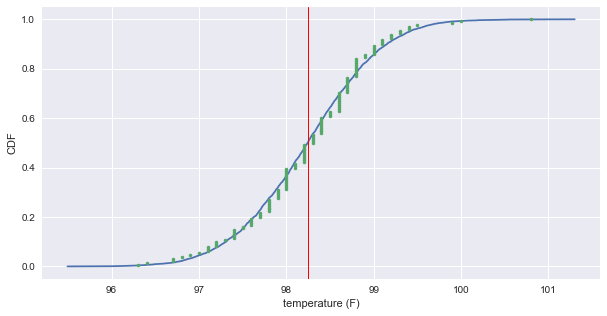

In [27]:
### Simulate a larger dataset with the same mean and std deviation to plot ECDF and later PDF
samples = np.random.normal(mean, std, size=5000) 
x, y    = ecdf(df.temperature) 
x_theor, y_theor = ecdf(samples) 

print('>>> mean    =', mean)
print('>>> std dev =', std)
print('>>> derived samples =', len(samples))

### Plot ECDF
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(x_theor, y_theor) 
plt.plot(x, y, marker='.', linestyle='none') 
plt.axvline(mean, color='r', linewidth=1)
plt.xlabel('temperature (F)') 
plt.ylabel('CDF') 
plt.show() 

>>> mean    = 98.24923076923078
>>> std dev = 0.7303577789050377
>>> derived samples = 5000


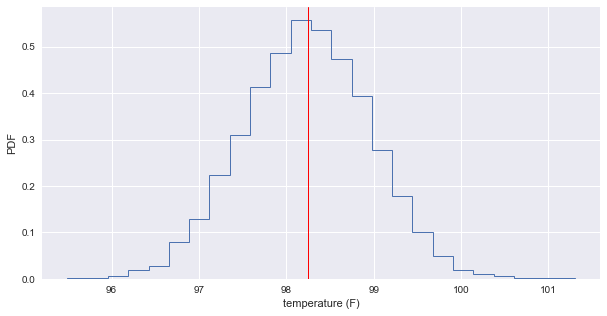

In [28]:
print('>>> mean    =', mean)
print('>>> std dev =', std)
print('>>> derived samples =', len(samples))

### Plot PDF
fig, ax = plt.subplots(figsize=(10,5))
result = plt.hist(samples, bins=25, normed=True, histtype='step', linewidth=1)
plt.axvline(mean, color='r', linewidth=1)

plt.xlabel('temperature (F)')
plt.ylabel('PDF')
plt.show()

In a normal distribution, the **mean** and the **median** have always the same value. In this particular case, they are so close to each other that I believe we can say that it is a normal distribution.

In [29]:
print('>>> mean    = %.3f' % np.mean(df.temperature))
print('>>> median  = %.3f' % np.median(df.temperature))

>>> mean    = 98.249
>>> median  = 98.300


On the other hand, in a *perfectly symmetrical bell curve*, the **mean**, **median** and **mode** are all the same value. However, this is not the case with the distribution of body temperatures. Even though the mean and median are relatively close values, the mode is not:

In [30]:
import scipy
print('>>> mean    = %.3f' % np.mean(df.temperature))
print('>>> median  = %.3f' % np.median(df.temperature))
print('>>> mode    = %.3f' % scipy.stats.mode(df.temperature)[0][0])

>>> mean    = 98.249
>>> median  = 98.300
>>> mode    = 98.000


The summary statistics in table below suggests only one outlier, value 100.8, easilly spotted in the boxplot above.

Almost all observations are within 2.5 standard deviations of the mean. Based on this evidence, the normality assumption seems reasonable:

In [31]:
print('>>> Range of values for 2.5 std dev: [', np.mean(df.temperature)-2.5, ', ', np.mean(df.temperature)+2.5, ']')

summary_df = pd.DataFrame({ 'samples' : df.temperature.shape[0],
                            'mean'    : np.mean(df.temperature),
                            'std dev' : np.std(df.temperature),
                            'min Temp': df.temperature.min(),
                            'max Temp': df.temperature.max() }, 
                          index=[0])

# specify columns orders
summary_df = summary_df[['samples', 'mean', 'std dev', 'min Temp', 'max Temp']]

# hide index when display the table
from IPython.display import HTML 
HTML(summary_df.to_html(index=False))

>>> Range of values for 2.5 std dev: [ 95.74923076923078 ,  100.74923076923078 ]


samples,mean,std dev,min Temp,max Temp
130,98.249231,0.730358,96.3,100.8


Another confirmation of the normal distribution comes from the **Shapiro-Wilk** normality test. It provides a good evidence that for these 5000 samples the null hypothesis is true: it is a normal distribution.

In [32]:
print(scipy.stats.shapiro(df.temperature)) # Outputs: (statistic test, p-value)

(0.9865769743919373, 0.2331680953502655)


---
## 2. Is the sample size large? Are the observations independent?

**Yes** and **yes**. Several [authors](https://www.researchgate.net/post/What_is_the_rationale_behind_the_magic_number_30_in_statistics) suggests that a sufficiently large sample size must have at least 30 samples. Even though there are authors that say that 20 or 50 are enough, there's no formal proof that validates any of these magic numbers. The fact that our sample size is 130 and much larger then the recommended sizes, is a good indication that 130 samples are more than enough.

Another indication that this a sufficiently large dataset comes from comparing the mean temperatures of this dataset (98.25 F) with the original dataset (98.6 F). There's a reduction of the mean by less than **0.4%** on these datasets, which is a pretty small change to have any dramatic effect on our statistical analysis.

In [33]:
print('>>> Sample size =', df.shape[0])

>>> Sample size = 130


Two observations are said to be **independent** if the occurrence of one provides no information about the occurrence of the other. As far as we can tell from the exercise and searching online about Carl Wunderlich's work, these observations weren't made on the same person (over time) Therefore, it makes sense to assume **they are independent observations**, probably gathered from hospital patients where he was a physician.

## 3. Is the true population mean really 98.6 degrees F?

> **First, a bootstrap hypothesis test:**

In [34]:
# Generates boostrap replicates for N tests
def gen_bootstrap_replicates(data, n, func):
    bs_replicates = np.empty(n)
    
    for i in range(n):
        bs_sample = np.random.choice(data, size=len(data))
        bs_replicates[i] = func(bs_sample) # apply the 
        
    return bs_replicates

>>> Bootstrap replicates (mean) = 98.25


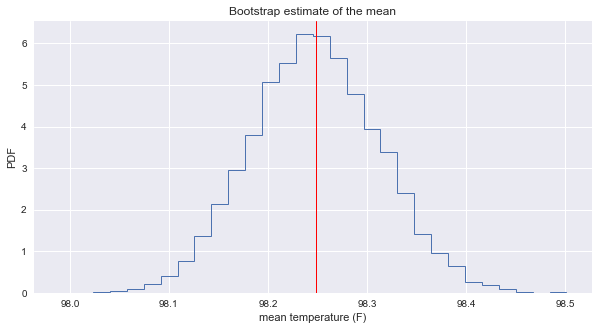

In [35]:
### Compute the approximate PDF of the mean temperature we would expect
### if we performed the measurements again.
###
bs_replicates_mean = gen_bootstrap_replicates(df.temperature, 10000, np.mean)
#print(bs_replicates_mean[:5]) # print head

bs_rep_mean = np.mean(bs_replicates_mean)
print('>>> Bootstrap replicates (mean) = %.2f' % bs_rep_mean)

### Plot PDF
fig, ax = plt.subplots(figsize=(10,5))
plt.hist(bs_replicates_mean, bins=30, normed = True, histtype='step', linewidth=1)
plt.axvline(bs_rep_mean, color='r', linewidth=1)
plt.title('Bootstrap estimate of the mean')
plt.xlabel('mean temperature (F)')
plt.ylabel('PDF')
plt.show()

To summarise this graphical result, we compute the 95% confidence interval of the means:

In [36]:
# if we repeated measurements over and over again, p% of the observed values would stay within the p% confidence interval
print('>>> Bootstrap confidence intervals: ', np.percentile(bs_replicates_mean, [2.5, 97.5]))

>>> Bootstrap confidence intervals:  [ 98.12384615  98.37694231]


**Hypothesis**: is the population mean of the bootstrap replicates really the same as in the original dataset?

**Most likely!** There is always a fluctuation from one sample of the original dataset to another, and it is unlikely that the sample mean will be exactly the same between them or even exactly equal to the original dataset. The difference between the bootstrap replicates mean and the population mean of the dataset could be due to sampling variation.

After computing the bootstrap confidence intervals for the mean, we have a 95% confidence that the average temperature stays between **[98.1, 98.4] F**. It's important to note that the upper threshold value is only 0.02% away from the true population mean (98.6 F). Given that the distance between them is only a fraction of 1% of the mean, it seems likely that the population mean of the original dataset really was 98.6 F.

> **Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?**

- **One-sample** tests the mean of a single group against a known mean;
- **Two-sample** tests the means of two groups against each other, but it requires access to the population data of both groups;

Since we don't have access to the original data from *Carl Wunderlich* we need to perform a **one-sample** test.

> * **In this situation, is it appropriate to use the $t$ or $z$ statistic?**

The answer is ** *t* statistic**! 

- The **Z-test** is used to compare the population mean against a sample or compare the population mean of two distributions with a sample size greater than 30, when std deviations are known;
- The **T-test** is used to compare the population mean against a sample, or compare the population mean of two distributions with a sample size less than 30, or when you don't know the population's standard deviation.

When the dataset has a sufficiently large amout of samples, when it has a normal distribution, and when it has the sample and population std deviations, we use the normal probability table (*z*-score) to represent the test statistic. 

**So in this particular case, our approach requires *t*-statistic since we don't know the std deviation of the population.**

According to [Amulya Aankul](https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f), the **t-test** (aka. Student’s T Test) compares two averages (means) and tells if they are different from each other. The t-test also tells how significant the differences are. In other words, it says if those differences could have happened by chance.

The **t-score** is the ratio of the difference between two groups and the difference within the groups. The larger the t-score, the more difference there are between groups. The smaller the t-score, the more similar the groups are. A t-score of 3 means that the groups are three times as different from each other as they are within each other. 

In this case, we have a very a t-score of **5.47**: the means are very distant from each other.  and therefore the data does not provide strong evidence that the mean temperature of our 130 samples dataset is different from the original dataset.

Another confirmation appears when comparing the `t-score` with the `p-value`: since the t-statistic is a lot smaller, the test concludes that there is no statistical significant difference between the two means.

Because the `p-value` is greater than 0.05, we fail to reject the null hypothesis that stated that both means are similar.

In [37]:
# T-test
def t_test(sample_mean, sample_sz, sample_std, pop_mean):
    # Standard Error
    SE = sample_std / np.sqrt(sample_sz)          
    print('>>> std error  =', SE)

    # T-Score (the t-statistic)
    t_score = (pop_mean - mean) / SE
    print('>>> t-score    =', t_score)

    # Compare with the critical t-value
    degrees_of_freedom = sample_sz - 1
    p = 1 - scipy.stats.t.cdf(t_score, df=degrees_of_freedom) #p-value after comparison with the t 
    print('>>> p-value    =', p)

In [38]:
sample_mean = np.mean(df.temperature)
sample_std = np.std(df.temperature)
sample_sz = df.temperature.shape[0]
pop_mean = 98.6
t_test(sample_mean, sample_sz, sample_std, pop_mean)

>>> std error  = 0.0640566146952
>>> t-score    = 5.47592520208
>>> p-value    = 1.09437323204e-07


> * **Now try using the other test. How is the result be different? Why?**

Z-test requires the population standard deviation, which we don't have. It can't be done.

## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests

In [39]:
# TODO

## 5. At what temperature should we consider someone's temperature to be "abnormal"?

In [40]:
# TODO

## 6. Is there a significant difference between males and females in normal temperature?

In [41]:
# TODO

In [42]:
# pandas bootstrapping with replacement (list comprehension)
np.mean([df.sample(len(df), replace=True)['temperature'].mean() for i in range(0,1000)])

98.250709230769218